---

# Combined features Based Classification

---


In [1]:
import numpy as np
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix
import matplotlib.pyplot as plt

2025-04-11 13:16:27.318508: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-11 13:16:27.466585: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744370187.524367    1139 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744370187.541063    1139 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1744370187.657389    1139 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

## Load dataset

In [2]:
Xa = np.load('../dataset/counts.npy')
Xb = np.load('../dataset/slopes.npy')
Xc = np.load('../dataset/stds.npy')
y = np.load('../dataset/labels.npy')
classes = np.load('../dataset/mappings.npy')

In [3]:
print(f'Xa shape: {Xa.shape}')
print(f'Xb shape: {Xb.shape}')
print(f'Xc shape: {Xc.shape}')
print(f'y shape: {y.shape}')

Xa shape: (36262, 73)
Xb shape: (36262, 73)
Xc shape: (36262, 73)
y shape: (36262, 40)


## Train-test split

In [4]:
Xa_train, Xa_temp, Xb_train, Xb_temp, Xc_train, Xc_temp, y_train, y_temp = train_test_split(Xa, Xb, Xc, y, test_size=0.3, random_state=42)
Xa_val, Xa_test, Xb_val, Xb_test, Xc_val, Xc_test, y_val, y_test = train_test_split(Xa_temp, Xb_temp, Xc_temp, y_temp, test_size=0.5, random_state=42)

## Model

In [5]:
a_input = keras.layers.Input(shape=(Xa.shape[1],))
b_input = keras.layers.Input(shape=(Xb.shape[1],))
c_input = keras.layers.Input(shape=(Xc.shape[1],))

In [6]:
a = keras.layers.Dense(512, activation='relu')(a_input)
a = keras.layers.Dense(512, activation='relu')(a)
a = keras.layers.Dropout(0.2)(a)
a = keras.layers.Dense(256, activation='relu')(a)
a = keras.layers.Dense(256, activation='relu')(a)
a = keras.layers.Dropout(0.2)(a)
a = keras.layers.Dense(128, activation='relu')(a)
a = keras.layers.Dense(64, activation='relu')(a)

I0000 00:00:1744364547.463860   45913 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5563 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4060 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9


In [7]:
b = keras.layers.Dense(512, activation='relu')(b_input)
b = keras.layers.Dense(512, activation='relu')(b)
b = keras.layers.Dropout(0.2)(b)
b = keras.layers.Dense(256, activation='relu')(b)
b = keras.layers.Dense(256, activation='relu')(b)
b = keras.layers.Dropout(0.2)(b)
b = keras.layers.Dense(128, activation='relu')(b)
b = keras.layers.Dense(64, activation='relu')(b)

In [8]:
c = keras.layers.Dense(512, activation='relu')(c_input)
c = keras.layers.Dense(512, activation='relu')(c)
c = keras.layers.Dropout(0.2)(c)
c = keras.layers.Dense(256, activation='relu')(c)
c = keras.layers.Dense(256, activation='relu')(c)
c = keras.layers.Dropout(0.2)(c)
c = keras.layers.Dense(128, activation='relu')(c)
c = keras.layers.Dense(64, activation='relu')(c)

In [9]:
x = keras.layers.concatenate([a, b, c])
x = keras.layers.Dense(128, activation='relu')(x)
x = keras.layers.Dense(64, activation='relu')(x)

In [10]:
output = keras.layers.Dense(y.shape[1], activation='softmax')(x)

model = keras.models.Model(inputs=[a_input, b_input, c_input], outputs=output)

In [11]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 73)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_1       │ (None, 73)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_2       │ (None, 73)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 512)       │     37,888 │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_6 (Dense)     │ (None, 512)       │     37,888 │ input_layer_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_12 (Dense)    │ (None, 512)       │     37,888 │ input_layer_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 512)       │    262,656 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_7 (Dense)     │ (None, 512)       │    262,656 │ dense_6[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_13 (Dense)    │ (None, 512)       │    262,656 │ dense_12[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 512)       │          0 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 512)       │          0 │ dense_7[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_4 (Dropout) │ (None, 512)       │          0 │ dense_13[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 256)       │    131,328 │ dropout[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_8 (Dense)     │ (None, 256)       │    131,328 │ dropout_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_14 (Dense)    │ (None, 256)       │    131,328 │ dropout_4[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 256)       │     65,792 │ dense_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_9 (Dense)     │ (None, 256)       │     65,792 │ dense_8[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_15 (Dense)    │ (None, 256)       │     65,792 │ dense_14[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 256)       │          0 │ dense_3[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 256)       │          0 │ dense_9[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_5 (Dropout) │ (None, 256)       │          0 │ dense_15[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 128)       │     32,896 │ dropout_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_10 (Dense)    │ (None, 128)       │     32,896 │ dropout_3[0][0]   │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 1,652,008 (6.30 MB)

 Trainable params: 1,652,008 (6.30 MB)

 Non-trainable params: 0 (0.00 B)

## Train

In [12]:
model.fit([Xa_train, Xb_train, Xc_train], y_train, validation_data=([Xa_val, Xb_val, Xc_val], y_val), epochs=50)

Epoch 1/50


I0000 00:00:1744364558.203529   46095 service.cc:152] XLA service 0x7f7e380019b0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1744364558.203571   46095 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 4060 Laptop GPU, Compute Capability 8.9
2025-04-11 11:42:38.293588: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1744364558.879577   46095 cuda_dnn.cc:529] Loaded cuDNN version 90300
2025-04-11 11:42:40.082366: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_814_0', 44 bytes spill stores, 44 bytes spill loads

2025-04-11 11:42:40.262781: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusi

 36/794 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.0410 - loss: 3.6600

I0000 00:00:1744364563.912855   46095 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


785/794 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1435 - loss: 3.0793

2025-04-11 11:42:48.248916: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_814', 64 bytes spill stores, 64 bytes spill loads

2025-04-11 11:42:49.567173: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_3022', 8 bytes spill stores, 8 bytes spill loads



794/794 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.1446 - loss: 3.0739

2025-04-11 11:42:53.290564: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_150_0', 44 bytes spill stores, 44 bytes spill loads

2025-04-11 11:42:53.657801: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_150', 484 bytes spill stores, 484 bytes spill loads

2025-04-11 11:42:55.544665: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_143_0', 36 bytes spill stores, 36 bytes spill loads

2025-04-11 11:42:55.643281: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_143', 4 bytes spill stores, 4 bytes spill loads

2025-04-11 11:42:56.261189: I external/l

794/794 ━━━━━━━━━━━━━━━━━━━━ 23s 19ms/step - accuracy: 0.1447 - loss: 3.0733 - val_accuracy: 0.3526 - val_loss: 2.0886
Epoch 2/50
794/794 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.3865 - loss: 1.9511 - val_accuracy: 0.4674 - val_loss: 1.7098
Epoch 3/50
794/794 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.4789 - loss: 1.6523 - val_accuracy: 0.4870 - val_loss: 1.6221
Epoch 4/50
794/794 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.5303 - loss: 1.4852 - val_accuracy: 0.5405 - val_loss: 1.4492
Epoch 5/50
794/794 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.5655 - loss: 1.3601 - val_accuracy: 0.5720 - val_loss: 1.3787
Epoch 6/50
794/794 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6086 - loss: 1.2254 - val_accuracy: 0.5760 - val_loss: 1.3831
Epoch 7/50
794/794 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6368 - loss: 1.1342 - val_accuracy: 0.5904 - val_loss: 1.3116
Epoch 8/50
794/794 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6620 - loss: 1.0522 - val_accuracy: 0.6148 - va

In [13]:
# Save the model
model.save('../models/combined_model.keras')

## Test

In [5]:
# Load the arohana-avarohana model
model = keras.models.load_model('../models/combined_model.keras')

I0000 00:00:1744370206.019653    1139 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5563 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4060 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9


In [7]:
loss, accuracy = model.evaluate([Xa_test, Xb_test, Xc_test], y_test)

170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6832 - loss: 1.7007


In [8]:
print(f'Test accuracy: {round(accuracy * 100, 2)}')

Test accuracy: 68.47


In [9]:
y_pred = model.predict([Xa_test, Xb_test, Xc_test])

170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [10]:
f1 = f1_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1), average='macro')
print(f'f1 score: {f1}')

f1 score: 0.6640654463206113


In [11]:
cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))

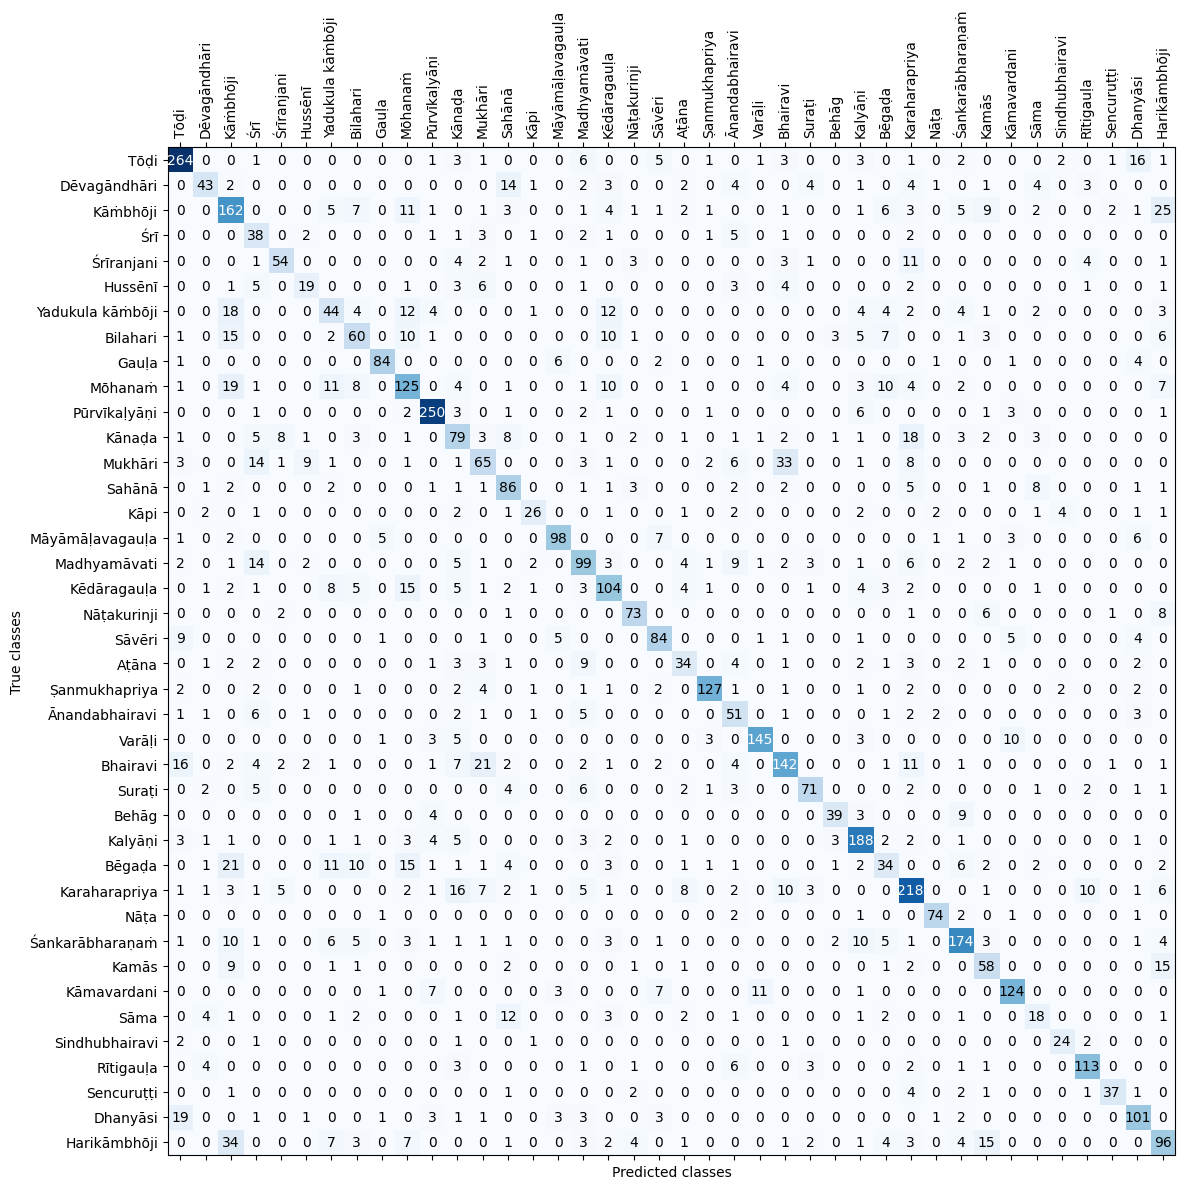

In [12]:
fig, ax = plt.subplots(figsize=(12, 12))
cax = ax.matshow(cm, cmap=plt.cm.Blues)

ax.set_xticks(np.arange(len(classes)))
ax.set_yticks(np.arange(len(classes)))
ax.set_xticklabels(classes, rotation=90)
ax.set_yticklabels(classes)

ax.set_xlabel('Predicted classes')
ax.set_ylabel('True classes')

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        color = 'black' if cm[i, j] < max(cm.flatten()) / 2 else 'white'
        ax.text(j, i, cm[i, j], ha='center', va='center', color=color)

plt.savefig('../plots/confusion_matrix_combined.png', dpi=300)
plt.tight_layout()
plt.show()

170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
                  precision    recall  f1-score   support

            Tōḍi       0.80      0.85      0.82       312
    Dēvagāndhāri       0.69      0.48      0.57        89
        Kāṁbhōji       0.53      0.64      0.58       255
             Śrī       0.36      0.66      0.47        58
      Śrīranjani       0.75      0.63      0.68        86
         Hussēnī       0.51      0.40      0.45        47
Yadukula kāṁbōji       0.44      0.38      0.41       115
        Bilahari       0.54      0.48      0.51       125
           Gauḷa       0.89      0.84      0.87       100
         Mōhanaṁ       0.60      0.59      0.60       212
    Pūrvīkaḷyāṇi       0.88      0.92      0.90       272
          Kānaḍa       0.50      0.54      0.52       145
         Mukhāri       0.52      0.44      0.48       149
          Sahānā       0.58      0.72      0.64       119
            Kāpi       0.72      0.55      0.63        47
 Māyāmāḷavagauḷa       0.85   

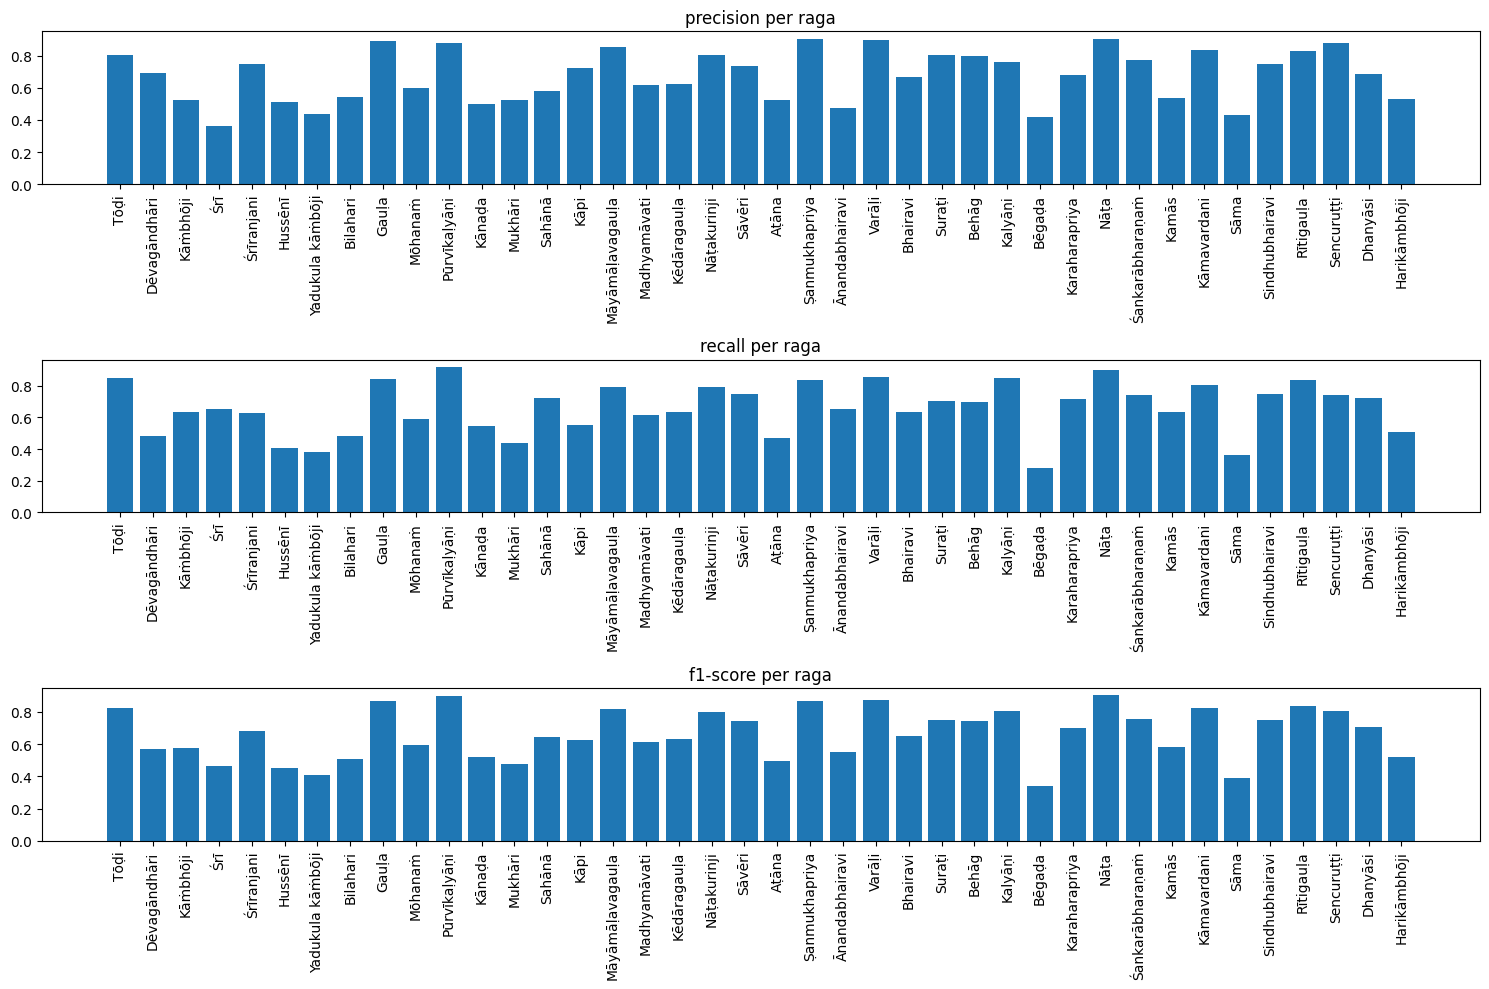

In [13]:
from sklearn.metrics import classification_report

# Get predictions
y_pred = model.predict([Xa_test, Xb_test, Xc_test])
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Generate classification report
report = classification_report(y_true_classes, y_pred_classes, target_names=classes, output_dict=True)
print(classification_report(y_true_classes, y_pred_classes, target_names=classes))

# Plot precision, recall and f1-score for each class
metrics = ['precision', 'recall', 'f1-score']
plt.figure(figsize=(15, 10))
for i, metric in enumerate(metrics):
    plt.subplot(3, 1, i+1)
    values = [report[raga][metric] for raga in classes]
    plt.bar(classes, values)
    plt.title(f'{metric} per raga')
    plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('../plots/metrics_per_class.png', dpi=300)
plt.show()